# Import libraries


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Load Dataset

In [3]:
# Load the dataset
url = './my_data/mushrooms.csv'  # Update with your file path
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

# Perform eda
1. basic information and description

In [4]:
# Perform data analysis
print("Dataset Information:")
print(data.info())

print("\nDataset Description:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  sta

2. Visualization


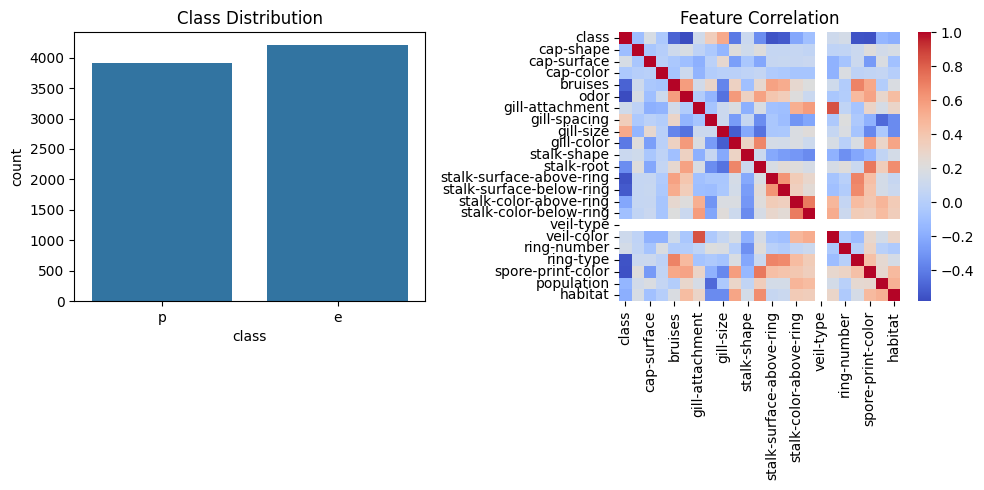

In [6]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='class', data=data)
plt.title('Class Distribution')

plt.subplot(1, 2, 2)
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(), cmap='coolwarm')
plt.title('Feature Correlation')

plt.tight_layout()
plt.show()


# Data preprocessing
Not needed, simple dataset with no missing values

In [7]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Example: Checking the transformed dataset
data_encoded.head()

class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0     True        False        False        False        False         True   
1    False        False        False        False        False         True   
2    False        False        False        False        False        False   
3     True        False        False        False        False         True   
4    False        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  ...  \
0          False           True          False        False  ...   
1          False           True          False        False  ...   
2          False           True          False        False  ...   
3          False          False           True        False  ...   
4          False           True          False        False  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0         False          True         False         False      False   
1          True         False         False         False       True   
2          True         False         False         False      False   
3         False          True         False         False      False   
4         False         False         False         False       True   

   habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0      False      False      False       True      False  
1      False      False      False      False      False  
2      False       True      False      False      False  
3      False      False      False       True      False  
4      False      False      False      False      False  

[5 rows x 96 columns]

# Building model (classification)

In [11]:
# Define features and target variable
X = data_encoded.drop('class_p', axis=1)
y = data_encoded['class_p']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the classification model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

# Making and evaluating predictions

In [13]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\\nModel Evaluation:")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


\nModel Evaluation:
Accuracy: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Result visualization


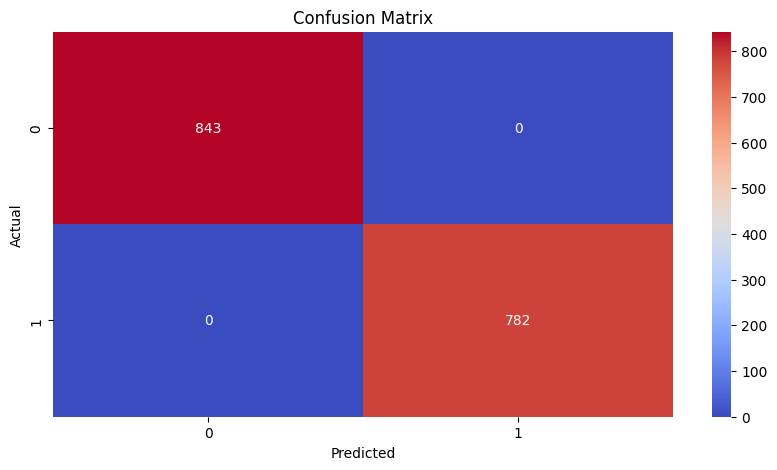

In [15]:
# Plot the results
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
